In [1]:
'''
Author: U. Saxena
Date: 09/20/2021
Course: DAEN-690
'''

'\nAuthor: U. Saxena\nDate: 09/20/2021\nCourse: DAEN-690\n'

In [156]:
import pandas as pd
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
import contextily as ctx
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv("harvey_highwater_incidents.csv")

In [4]:
#drop the columns
data = data.drop(columns=['TXDOT_INCIDENT_ID', 'TXDOT_CROSS_STREET_QUAL', 'MAINLANES_BLOCKED',
                         'FRONTAGE_LANES_BLOCKED', 'RAMP_LANES_BLOCKED', 'HOV_LANES_BLOCKED',
                         'SHOULDER_LANES_BLOCKED', 'DETECTION_DATE_TIME', 'VERIFICATION_DATE_TIME',
                         'TYPE_HAZMAT_SPILL', 'RESPONSE_POLICE_COUNTY', 'RESPONSE_POLICE_METRO',
                         'RESPONSE_POLICE_STATE', 'RESPONSE_TXDOT', 'RESPONSE_WRECKER', 'VEHICLES_INVOLVED',
                         'TXDOT_INCIDENT_STATUS', 'TYPE_HEAVY_TRUCK', 'TYPE_HIGH_WATER', 'RESPONSE_FIREDEPT', 'RESPONSE_HAZMAT',
                         'RESPONSE_HCFCD', 'RESPONSE_MAP', 'RESPONSE_METRO', 'RESPONSE_POLICE_CITY',
                         'TYPE_ICE_ON_ROADWAY',
                        'TYPE_LOST_LOAD', 'TYPE_ROAD_DEBRIS', 'TYPE_STALL', 'TYPE_VEHICLE_FIRE',
       'TYPE_OTHER', 'TYPE_BUS', 'TYPE_ACCIDENT', 'TYPE_CONSTRUCTION',
       'MAP_DISPATCHED', 'DETECTED_BY', 'WEATHER_CONDITIONS', 'WEATHER_RAIN',
       'WEATHER_SNOW_ICE', 'WEATHER_HAIL', 'WEATHER_FOG', 'WEATHER_HIGH_WIND',
       'WEATHER_DUST', 'WEATHER_SMOKE', 'WEATHER_OTHER', 'WEATHER_OTHER_TEXT',
       'VISIBILITY', 'VERIFIED_CCTV', 'VERIFIED_COMMERCIAL', 'VERIFIED_MAP',
       'VERIFIED_METRO', 'VERIFIED_POLICE_CITY', 'VERIFIED_POLICE_COUNTY',
       'VERIFIED_POLICE_METRO', 'VERIFIED_POLICE_STATE', 'VERIFIED_OTHER',
       'RESPONSE_CITY', 'RESPONSE_CORONER', 'RESPONSE_COUNTY', 'RESPONSE_EMS'])

In [5]:
data.head()

,ROADWAY_NAME,TXDOT_ROADWAY_DIRECTION,CROSS_STREET_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TXDOT_LANES_AFFECTED,TIME_ENTERED,CLEARED_DATE_TIME,TOTAL_MINUTES
0,BELTWAY 8-EAST,Southbound,WALLISVILLE,29.8085,29.8089,-95.1639,-95.1628,Harris,Alternate Lanes,8/26/2017 3:56,8/26/2017 3:56,0
1,BELTWAY 8-EAST,Northbound,SPENCER HWY,29.6656,29.6656,-95.1558,-95.1556,Harris,Alternate Lanes,8/26/2017 8:06,8/26/2017 14:03,357
2,BELTWAY 8-EAST,Northbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 1:50,8/30/2017 8:55,4745
3,BELTWAY 8-EAST,Southbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 8:49,8/30/2017 9:20,4351
4,BELTWAY 8-EAST,Northbound,FAIRMONT PKWY,29.6498,29.6498,-95.1562,-95.1561,Harris,Alternate Lanes,8/27/2017 11:55,8/30/2017 8:53,4138


In [6]:
data['COUNTY_NAME'].unique()

array(['Harris', 'Waller', 'Fort_Bend', 'Brazoria', 'Montgomery',
       'Galveston', 'Austin', 'Chambers'], dtype=object)

In [7]:
data.head()

,ROADWAY_NAME,TXDOT_ROADWAY_DIRECTION,CROSS_STREET_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TXDOT_LANES_AFFECTED,TIME_ENTERED,CLEARED_DATE_TIME,TOTAL_MINUTES
0,BELTWAY 8-EAST,Southbound,WALLISVILLE,29.8085,29.8089,-95.1639,-95.1628,Harris,Alternate Lanes,8/26/2017 3:56,8/26/2017 3:56,0
1,BELTWAY 8-EAST,Northbound,SPENCER HWY,29.6656,29.6656,-95.1558,-95.1556,Harris,Alternate Lanes,8/26/2017 8:06,8/26/2017 14:03,357
2,BELTWAY 8-EAST,Northbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 1:50,8/30/2017 8:55,4745
3,BELTWAY 8-EAST,Southbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 8:49,8/30/2017 9:20,4351
4,BELTWAY 8-EAST,Northbound,FAIRMONT PKWY,29.6498,29.6498,-95.1562,-95.1561,Harris,Alternate Lanes,8/27/2017 11:55,8/30/2017 8:53,4138


In [28]:
#read the shape file
county_tx_map = gpd.read_file("/Users/urvashisaxena/jupyter_python/GMU/DAEN690/Texas_Gulf_Coast_Counties/County.shp")

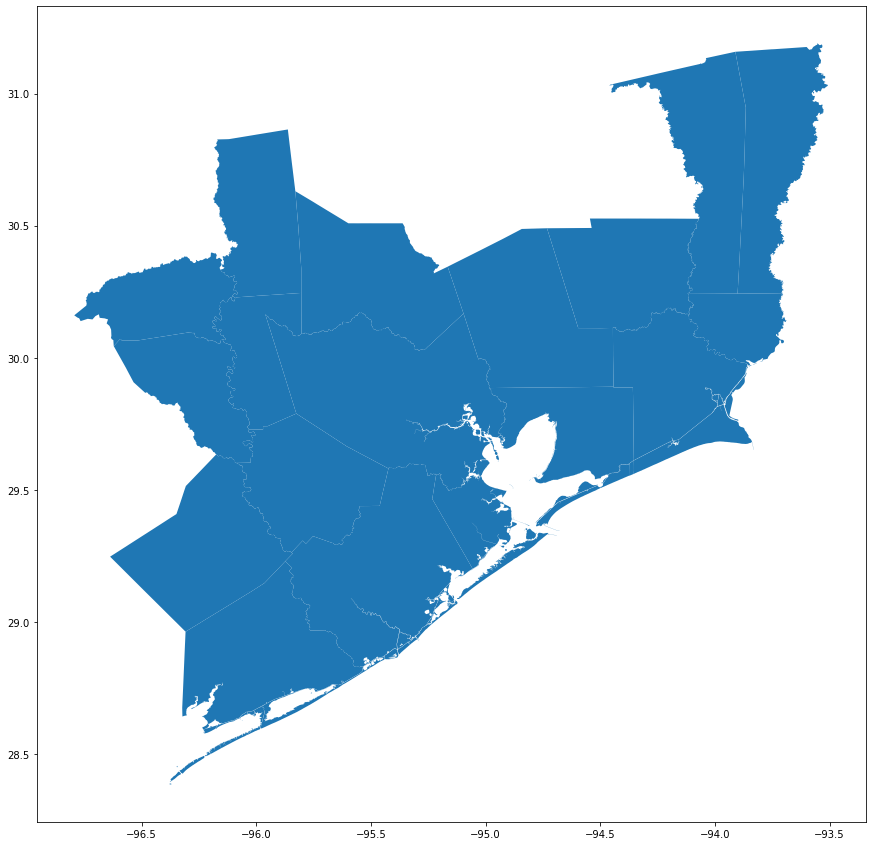

In [29]:
#print the shape file
fig, ax = plt.subplots(figsize = (15,15))
county_tx_map.plot(ax = ax)

In [21]:
df = data

In [22]:
df.head()

,ROADWAY_NAME,TXDOT_ROADWAY_DIRECTION,CROSS_STREET_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TXDOT_LANES_AFFECTED,TIME_ENTERED,CLEARED_DATE_TIME,TOTAL_MINUTES,geometry
0,BELTWAY 8-EAST,Southbound,WALLISVILLE,29.8085,29.8089,-95.1639,-95.1628,Harris,Alternate Lanes,8/26/2017 3:56,8/26/2017 3:56,0,POINT (-95.16390 29.80850)
1,BELTWAY 8-EAST,Northbound,SPENCER HWY,29.6656,29.6656,-95.1558,-95.1556,Harris,Alternate Lanes,8/26/2017 8:06,8/26/2017 14:03,357,POINT (-95.15580 29.66560)
2,BELTWAY 8-EAST,Northbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 1:50,8/30/2017 8:55,4745,POINT (-95.19840 29.88300)
3,BELTWAY 8-EAST,Southbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 8:49,8/30/2017 9:20,4351,POINT (-95.19840 29.88300)
4,BELTWAY 8-EAST,Northbound,FAIRMONT PKWY,29.6498,29.6498,-95.1562,-95.1561,Harris,Alternate Lanes,8/27/2017 11:55,8/30/2017 8:53,4138,POINT (-95.15620 29.64980)


In [30]:
crs = {'init': 'epsg:4326'}

In [31]:
geom = [Point(xy) for xy in zip(df["LONGITUDE_IB_CW"], df["LATITUDE_IB_CW"])]
geom[:3]

In [32]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geom)
geo_df.head()

/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ROADWAY_NAME,TXDOT_ROADWAY_DIRECTION,CROSS_STREET_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TXDOT_LANES_AFFECTED,TIME_ENTERED,CLEARED_DATE_TIME,TOTAL_MINUTES,geometry
0,BELTWAY 8-EAST,Southbound,WALLISVILLE,29.8085,29.8089,-95.1639,-95.1628,Harris,Alternate Lanes,8/26/2017 3:56,8/26/2017 3:56,0,POINT (-95.16390 29.80850)
1,BELTWAY 8-EAST,Northbound,SPENCER HWY,29.6656,29.6656,-95.1558,-95.1556,Harris,Alternate Lanes,8/26/2017 8:06,8/26/2017 14:03,357,POINT (-95.15580 29.66560)
2,BELTWAY 8-EAST,Northbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 1:50,8/30/2017 8:55,4745,POINT (-95.19840 29.88300)
3,BELTWAY 8-EAST,Southbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 8:49,8/30/2017 9:20,4351,POINT (-95.19840 29.88300)
4,BELTWAY 8-EAST,Northbound,FAIRMONT PKWY,29.6498,29.6498,-95.1562,-95.1561,Harris,Alternate Lanes,8/27/2017 11:55,8/30/2017 8:53,4138,POINT (-95.15620 29.64980)


In [33]:
#list of counties for texas for incidents
df['COUNTY_NAME'].unique()

array(['Harris', 'Waller', 'Fort_Bend', 'Brazoria', 'Montgomery',
       'Galveston', 'Austin', 'Chambers'], dtype=object)

Text(0.5, 1, 'Coordinates of Highwater Incidents in Texas - Hurricane Harvey 2017')

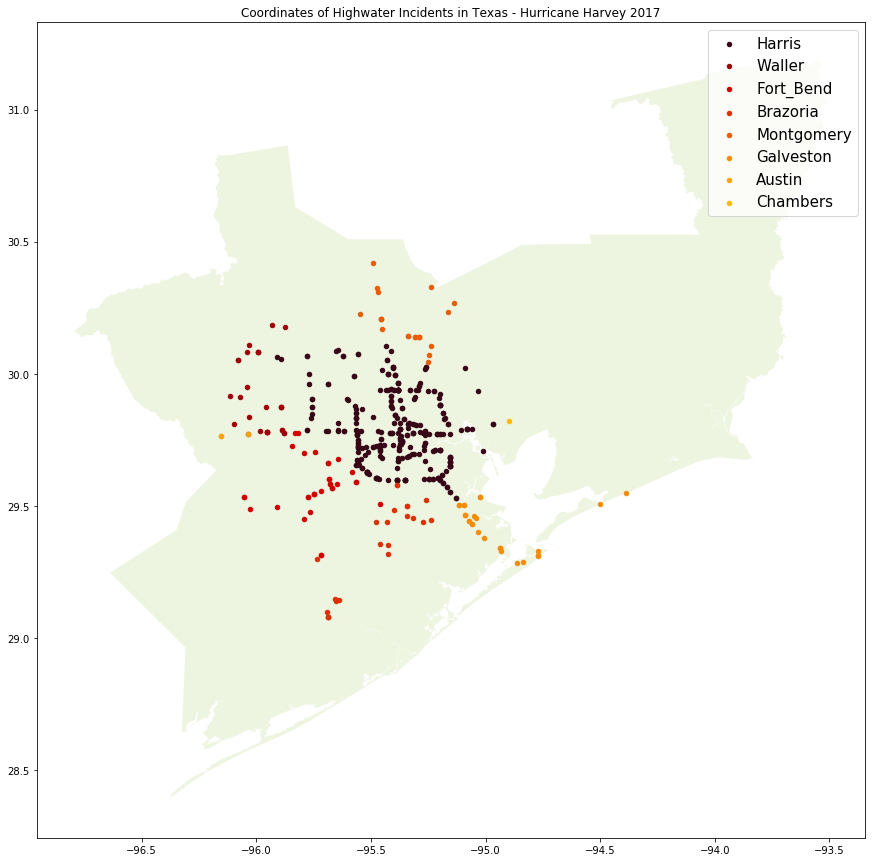

In [34]:
#plot the graph for detailed_County_TXCounty.shp
fig, ax = plt.subplots(figsize = (15,15))
county_tx_map.geometry.plot(ax = ax, alpha = 0.4, color = "#d3e4b0")
geo_df[geo_df['COUNTY_NAME'] == "Harris"].geometry.plot(ax = ax, markersize = 20, color ="#370617", label = "Harris")
geo_df[geo_df['COUNTY_NAME'] == "Waller"].plot(ax = ax, markersize =20, color ="#9D0208", label = "Waller")
geo_df[geo_df['COUNTY_NAME'] == "Fort_Bend"].plot(ax = ax, markersize =20, color ="#D00000", label = "Fort_Bend")
geo_df[geo_df['COUNTY_NAME'] == "Brazoria"].plot(ax = ax, markersize =20, color ="#DC2F02", label = "Brazoria")
geo_df[geo_df['COUNTY_NAME'] == "Montgomery"].plot(ax = ax, markersize =20, color ="#E85D04", label = "Montgomery")
geo_df[geo_df['COUNTY_NAME'] == "Galveston"].plot(ax = ax, markersize =20, color ="#F48C06", label = "Galveston")
geo_df[geo_df['COUNTY_NAME'] == "Austin"].plot(ax = ax, markersize =20, color ="#FAA307", label = "Austin")
geo_df[geo_df['COUNTY_NAME'] == "Chambers"].plot(ax = ax, markersize =20, color ="#FFBA08", label = "Chambers")
plt.legend(prop={'size': 15})
plt.title("Coordinates of Highwater Incidents in Texas - Hurricane Harvey 2017")

In [35]:
rainfall = pd.read_csv("Rainfall_texas_only.csv")
#print the max and min of lat and long for the incidents csv
print("Max LAT for rainfall: ", max(rainfall['LAT']))
print("Min LAT for rainfall", min(rainfall['LAT']))
print("Max LONG for rainfall: ", max(rainfall['LON']))
print("Min LONG for rainfall", min(rainfall['LON']))

print("Max LAT for incidents: ", max(df['LATITUDE_IB_CW']))
print("Min LAT for incidents", min(df['LATITUDE_IB_CW']))
print("Max LONG for incidents: ", max(df['LONGITUDE_IB_CW']))
print("Min LONG for incidents", min(df['LONGITUDE_IB_CW']))

Max LAT for rainfall:  30.42
Min LAT for rainfall 29.11
Max LONG for rainfall:  -94.3889
Min LONG for rainfall -96.15
Max LAT for incidents:  30.421
Min LAT for incidents 29.07855
Max LONG for incidents:  -94.38837158
Min LONG for incidents -96.1527


In [36]:
'''
MAX LONG -94.38837158
MIN LONG -96.1527

MAX LAT 30.421
MIN LAT 29.07855
'''

#remove rows from rainfall where the lat/long is not greater than max of lat/long from incidents 
#and the lat/long is not less than the min of lat/long from incidents
    
#indexNames = rainfall[(rainfall['LAT'] > 30.421 & rainfall['LAT'] < 29.07855
#                      & rainfall['LON'] > -94.38837158 & rainfall['LON'] < -96.1527)].index
#rainfall = rainfall.drop(indexNames , inplace=True)

#indexNames = rainfall[(rainfall['LON'] < -96.1527)].index
#rainfall.to_csv("Rainfall_texas_only_Part2.csv", index = True, header = True)

'\nMAX LONG -94.38837158\nMIN LONG -96.1527\n\nMAX LAT 30.421\nMIN LAT 29.07855\n'

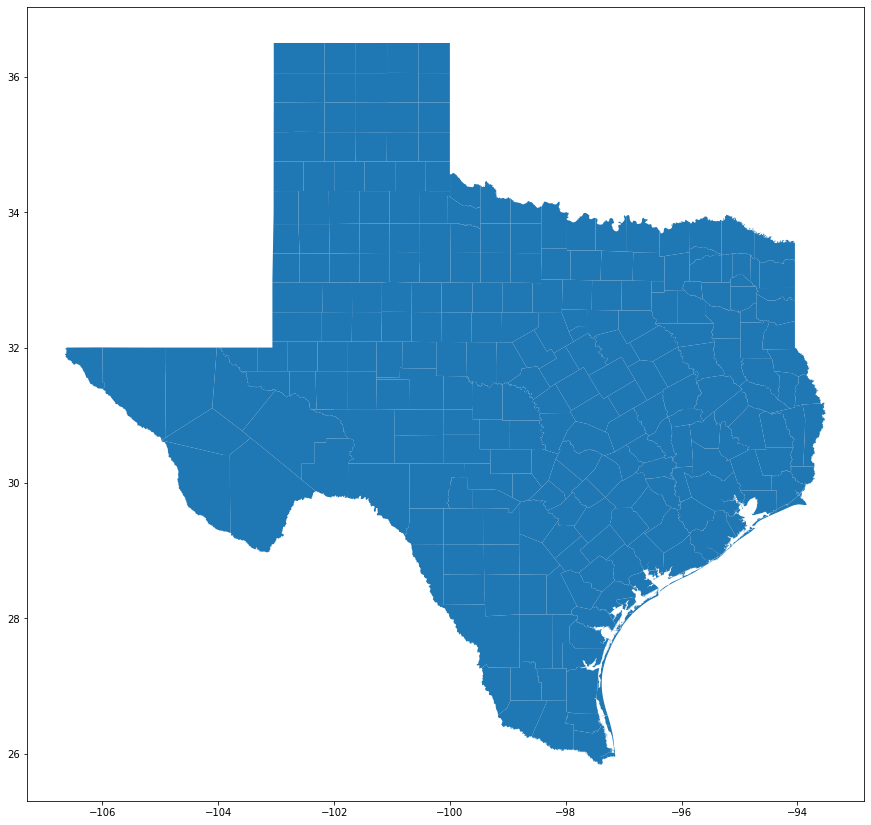

In [37]:
#read the shape file
texas_ct_map = gpd.read_file("/Users/urvashisaxena/jupyter_python/GMU/DAEN690/Texas_Counties/County.shp")
#print the shape file
fig, ax = plt.subplots(figsize = (15,15))
texas_ct_map.plot(ax = ax)

In [38]:
crs = {'init': 'epsg:4326'}
#set the coordinates
geom_rf = [Point(xy) for xy in zip(rainfall["LON"], rainfall["LAT"])]
geom_rf[:3]

In [39]:
#create geo dataframe
geo_rf = gpd.GeoDataFrame(rainfall, crs = crs, geometry = geom_rf)
geo_rf.head()

/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Unnamed: 0,CITY,LAT,LON,25-Aug,26-Aug,27-Aug,28-Aug,29-Aug,30-Aug,31-Aug,1-Sep,Totals,Sum,IsSum_Total_Same?,geometry
0,3,8214 N High Island,29.550000,-95.08000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.12,0.00,0.0,POINT (-95.08000 29.55000)
1,17,ADDICKS,29.800000,-95.77000,NaN,NaN,NaN,NaN,5.55,NaN,NaN,NaN,5.55,5.55,1.0,POINT (-95.77000 29.80000)
2,18,Addicks 1 ENE,29.790000,-95.62000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.20,0.00,0.0,POINT (-95.62000 29.79000)
3,19,Addicks 1 SSW,29.760000,-95.65000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.30,0.00,0.0,POINT (-95.65000 29.76000)
4,20,Addicks Dam,29.790908,-95.62357,0.88,9.12,17.08,5.04,1.32,0.0,0.0,NaN,33.44,33.44,1.0,POINT (-95.62357 29.79091)


Text(0.5, 263.57957193835483, 'Longitude')

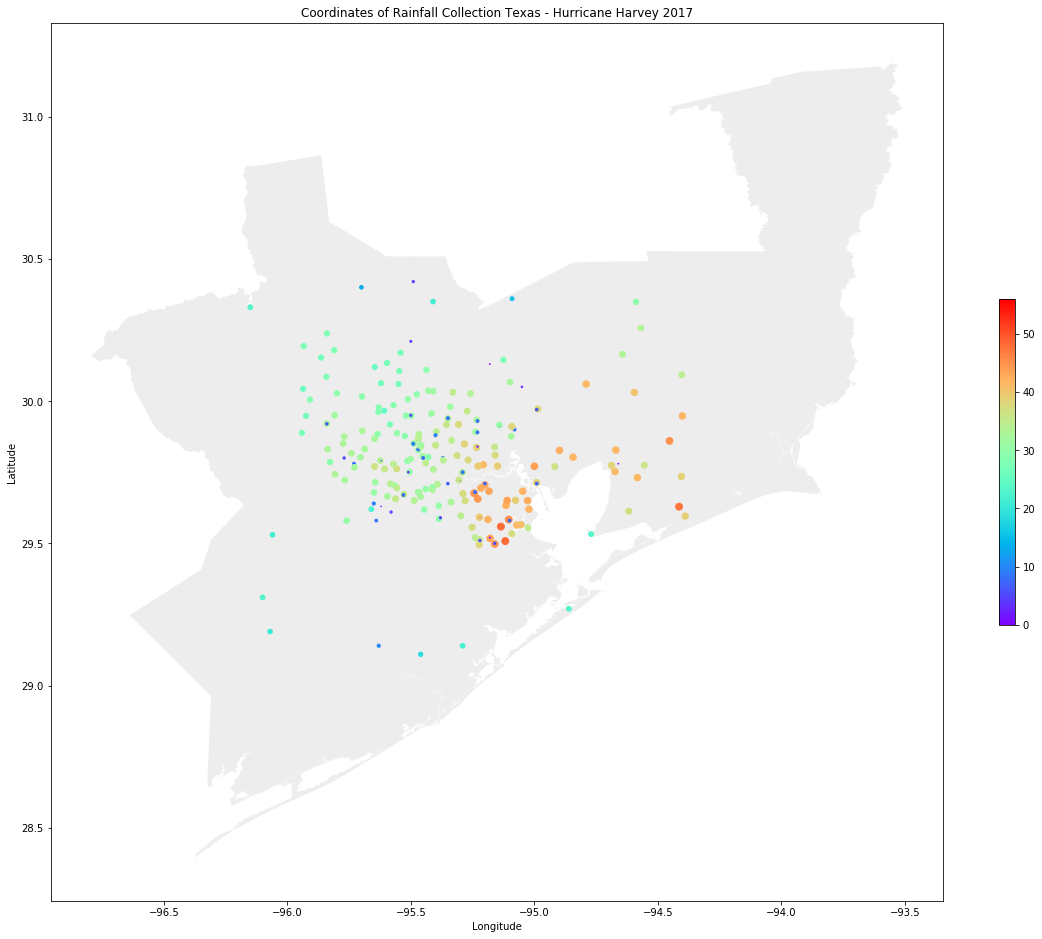

In [40]:
#plot the graph for detailed_County_TXCounty.shp
fig, ax = plt.subplots(figsize = (20, 20))
county_tx_map.geometry.plot(ax = ax, alpha = 0.4, color = "lightgrey")
geo_rf.plot(column = 'Totals', ax = ax, cmap = 'rainbow', legend= True, legend_kwds={"shrink" : 0.3},
            markersize = 'Sum')
ax.set_title("Coordinates of Rainfall Collection Texas - Hurricane Harvey 2017")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")


In [41]:
from geopandas.tools import overlay

In [42]:
gdfs = geo_df.append(geo_rf)

/Users/urvashisaxena/anaconda3/envs/ds/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [43]:
gdfs.columns

Index(['1-Sep', '25-Aug', '26-Aug', '27-Aug', '28-Aug', '29-Aug', '30-Aug',
       '31-Aug', 'CITY', 'CLEARED_DATE_TIME', 'COUNTY_NAME',
       'CROSS_STREET_NAME', 'IsSum_Total_Same?', 'LAT', 'LATITUDE_IB_CW',
       'LATITUDE_OB_CCW', 'LON', 'LONGITUDE_IB_CW', 'LONGITUDE_OB_CCW',
       'ROADWAY_NAME', 'Sum', 'TIME_ENTERED', 'TOTAL_MINUTES',
       'TXDOT_LANES_AFFECTED', 'TXDOT_ROADWAY_DIRECTION', 'Totals',
       'Unnamed: 0', 'geometry'],
      dtype='object')

Text(0.5, 263.3311885247695, 'Longitude')

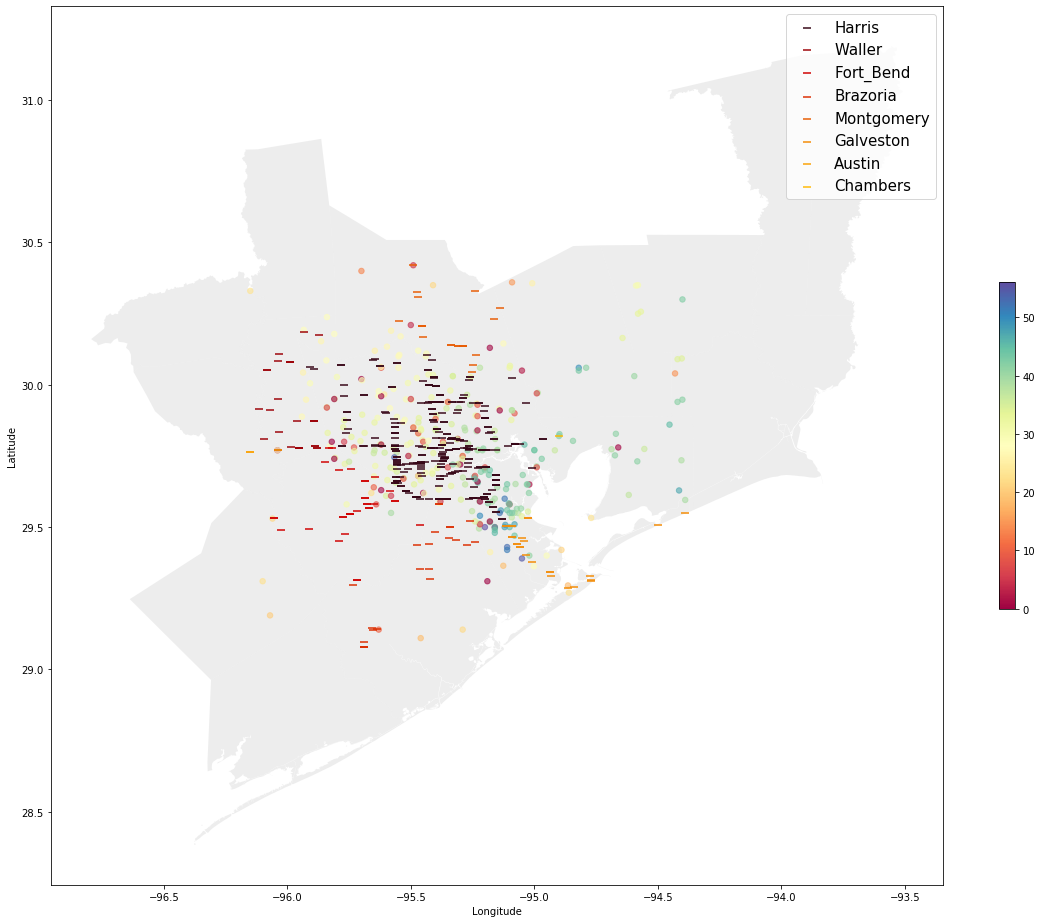

In [44]:
fig, ax = plt.subplots(figsize = (20, 20))
county_tx_map.geometry.plot(ax = ax, alpha = 0.4, color = "lightgrey")
#gdfs.geometry.plot(ax = ax, markersize = 30)
gdfs.plot(column = 'Totals', ax = ax, alpha = 0.6, cmap = 'Spectral', legend= True, marker='o', legend_kwds={"shrink" : 0.3}, markersize = 30)
#gdfs[gdfs['Totals'] > 0 ].plot(ax=ax, alpha = 0.1, markersize =80, color = "purple", label = "Rainfall Collection Sites")
gdfs[gdfs['COUNTY_NAME'] == "Harris"].plot(ax = ax, markersize = 50, marker = "_", color ="#370617", label = "Harris")
gdfs[gdfs['COUNTY_NAME'] == "Waller"].plot(ax = ax, markersize =50, marker = "_", color ="#9D0208", label = "Waller")
gdfs[gdfs['COUNTY_NAME'] == "Fort_Bend"].plot(ax = ax, markersize =50,marker = "_", color ="#D00000", label = "Fort_Bend")
gdfs[gdfs['COUNTY_NAME'] == "Brazoria"].plot(ax = ax, markersize =50, marker = "_", color ="#DC2F02", label = "Brazoria")
gdfs[gdfs['COUNTY_NAME'] == "Montgomery"].plot(ax = ax, markersize =50, marker = "_", color ="#E85D04", label = "Montgomery")
gdfs[gdfs['COUNTY_NAME'] == "Galveston"].plot(ax = ax, markersize =50, marker = "_", color ="#F48C06", label = "Galveston")
gdfs[gdfs['COUNTY_NAME'] == "Austin"].plot(ax = ax, markersize =50, marker = "_", color ="#FAA307", label = "Austin")
gdfs[gdfs['COUNTY_NAME'] == "Chambers"].plot(ax = ax, markersize =50, marker = "_", color ="#FFBA08", label = "Chambers")
plt.legend(prop={'size': 15})
#ax.set_title("Coordinates of Rainfall Collection Texas - Hurricane Harvey 2017")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

In [46]:
test = gpd.read_file("/Users/urvashisaxena/jupyter_python/GMU/DAEN690/detailed_Gulf_Coast_Counties/County.shp")
#test.plot(ax = ax)

In [47]:
test = gdfs.to_crs(epsg=3857)

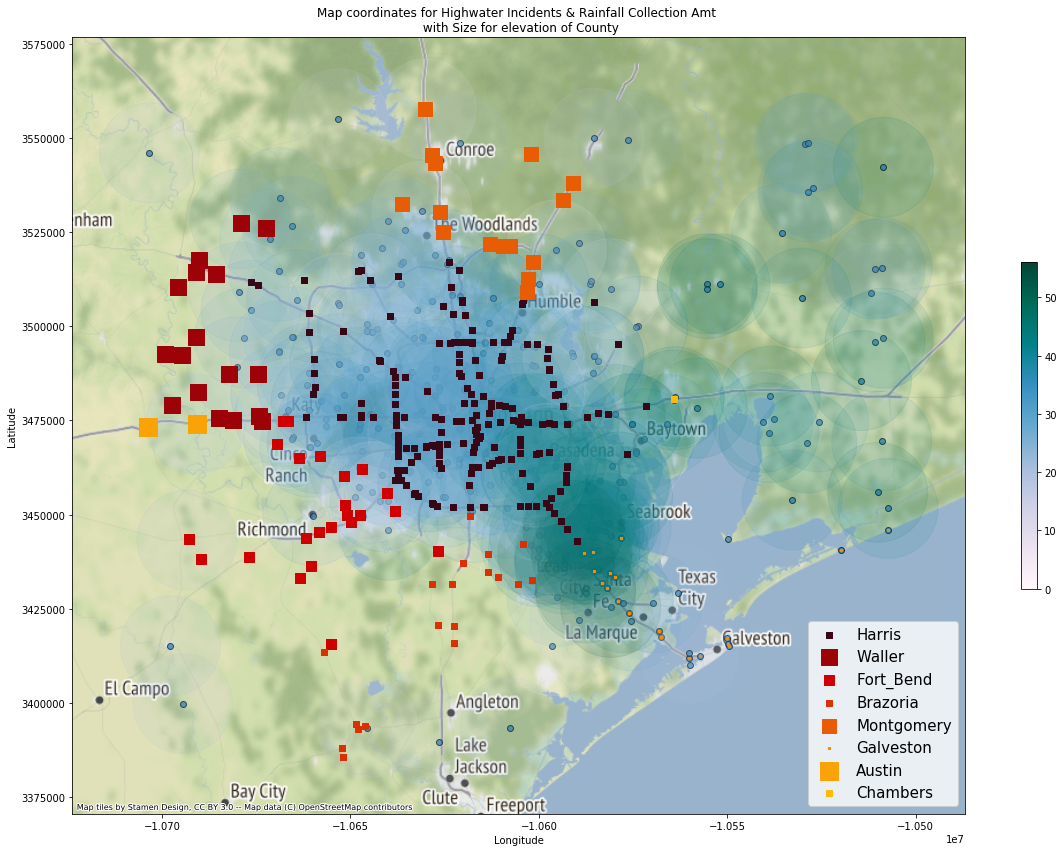

In [48]:
#ax = test.plot(figsize=(20, 20), alpha=0.7, edgecolor='k')
#ax = test.plot(figsize = (20, 20), alpha=0.9, edgecolor = 'k')
ax = test.plot(figsize=(20,20), alpha=0.7, edgecolor='k')
ax = test.plot(column = 'Totals', ax = ax, alpha = 0.1, cmap = 'PuBuGn', legend= True, marker='o', 
               legend_kwds={"shrink" : 0.3}, markersize = 10000)
ax = test[test['COUNTY_NAME'] == "Harris"].plot(ax = ax, markersize = 43 ,marker = 's', color ="#370617", label = "Harris")
ax = test[test['COUNTY_NAME'] == "Waller"].plot(ax = ax, markersize = 227,marker = 's', color ="#9D0208", label = "Waller")
ax = test[test['COUNTY_NAME'] == "Fort_Bend"].plot(ax = ax, markersize = 92,marker = 's', color ="#D00000", label = "Fort_Bend")
ax = test[test['COUNTY_NAME'] == "Brazoria"].plot(ax = ax, markersize = 30,marker = 's',  color ="#DC2F02", label = "Brazoria")
ax = test[test['COUNTY_NAME'] == "Montgomery"].plot(ax = ax, markersize = 205,marker = 's', color ="#E85D04", label = "Montgomery")
ax = test[test['COUNTY_NAME'] == "Galveston"].plot(ax = ax, markersize = 7,marker = 's', color ="#F48C06", label = "Galveston")
ax = test[test['COUNTY_NAME'] == "Austin"].plot(ax = ax, markersize = 292,marker = 's', color ="#FAA307", label = "Austin")
ax = test[test['COUNTY_NAME'] == "Chambers"].plot(ax = ax, markersize = 30,marker = 's', color ="#FFBA08", label = "Chambers")
ax.legend(prop={'size': 15}) 
ax.set_title("Map coordinates for Highwater Incidents & Rainfall Collection Amt \n with Size for elevation of County")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
ctx.add_basemap(ax)



In [49]:
test

,1-Sep,25-Aug,26-Aug,27-Aug,28-Aug,29-Aug,30-Aug,31-Aug,CITY,CLEARED_DATE_TIME,...,LONGITUDE_OB_CCW,ROADWAY_NAME,Sum,TIME_ENTERED,TOTAL_MINUTES,TXDOT_LANES_AFFECTED,TXDOT_ROADWAY_DIRECTION,Totals,Unnamed: 0,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/26/2017 3:56,...,-95.162800,BELTWAY 8-EAST,NaN,8/26/2017 3:56,0.0,Alternate Lanes,Southbound,NaN,NaN,POINT (-10593596.890 3478957.978)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/26/2017 14:03,...,-95.155600,BELTWAY 8-EAST,NaN,8/26/2017 8:06,357.0,Alternate Lanes,Northbound,NaN,NaN,POINT (-10592695.202 3460637.856)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/30/2017 8:55,...,-95.198400,BELTWAY 8-EAST,NaN,8/27/2017 1:50,4745.0,Alternate Lanes,Northbound,NaN,NaN,POINT (-10597437.412 3488519.432)
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/30/2017 9:20,...,-95.198400,BELTWAY 8-EAST,NaN,8/27/2017 8:49,4351.0,Alternate Lanes,Southbound,NaN,NaN,POINT (-10597437.412 3488519.432)
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/30/2017 8:53,...,-95.156100,BELTWAY 8-EAST,NaN,8/27/2017 11:55,4138.0,Alternate Lanes,Northbound,NaN,NaN,POINT (-10592739.730 3458613.859)
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/31/2017 17:27,...,-95.162800,BELTWAY 8-EAST,NaN,8/27/2017 20:44,5563.0,Alternate Lanes,Southbound,NaN,NaN,POINT (-10593596.890 3478957.978)
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/26/2017 15:43,...,-95.303400,BELTWAY 8-NORTH,NaN,8/26/2017 8:44,419.0,Alternate Lanes,Eastbound,NaN,NaN,POINT (-10609125.959 3495788.347)
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/26/2017 9:49,...,-95.331300,BELTWAY 8-NORTH,NaN,8/26/2017 8:46,63.0,All Main Lanes,Eastbound,NaN,NaN,POINT (-10612231.773 3495736.962)
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/26/2017 9:48,...,-95.331300,BELTWAY 8-NORTH,NaN,8/26/2017 8:47,61.0,All Main Lanes,Westbound,NaN,NaN,POINT (-10612231.773 3495736.962)
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/30/2017 10:17,...,-95.295700,BELTWAY 8-NORTH,NaN,8/27/2017 0:19,4918.0,Alternate Lanes,Westbound,NaN,NaN,POINT (-10608302.195 3495801.193)


In [50]:
test.to_csv("merged.csv", index = False, header=True)

,ROADWAY_NAME,TXDOT_ROADWAY_DIRECTION,CROSS_STREET_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TXDOT_LANES_AFFECTED,TIME_ENTERED,CLEARED_DATE_TIME,TOTAL_MINUTES,geometry
0,BELTWAY 8-EAST,Southbound,WALLISVILLE,29.8085,29.8089,-95.1639,-95.1628,Harris,Alternate Lanes,8/26/2017 3:56,8/26/2017 3:56,0,POINT (-95.16280 29.80890)
1,BELTWAY 8-EAST,Northbound,SPENCER HWY,29.6656,29.6656,-95.1558,-95.1556,Harris,Alternate Lanes,8/26/2017 8:06,8/26/2017 14:03,357,POINT (-95.15560 29.66560)
2,BELTWAY 8-EAST,Northbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 1:50,8/30/2017 8:55,4745,POINT (-95.19840 29.88300)
3,BELTWAY 8-EAST,Southbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 8:49,8/30/2017 9:20,4351,POINT (-95.19840 29.88300)
4,BELTWAY 8-EAST,Northbound,FAIRMONT PKWY,29.6498,29.6498,-95.1562,-95.1561,Harris,Alternate Lanes,8/27/2017 11:55,8/30/2017 8:53,4138,POINT (-95.15610 29.64980)


In [558]:
#CLEARED_DATE_TIME_OLD
split_data = df["TIME_ENTERED"].str.split(" ")
dataTemp = split_data.to_list()
names = ["ENTER_DATE", "ENTER_TIME"]
new_df = pd.DataFrame(dataTemp, columns=names)

In [559]:
#add the cols
df["ENTER_DATE"] = new_df["ENTER_DATE"];
df["ENTER_TIME"] = new_df["ENTER_TIME"];

In [557]:
df.drop(columns={"CLEARED_DATE", "CLEARED_TIME"})

,ROADWAY_NAME,TXDOT_ROADWAY_DIRECTION,CROSS_STREET_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TXDOT_LANES_AFFECTED,TIME_ENTERED,CLEARED_DATE_TIME,TOTAL_MINUTES,geometry
0,BELTWAY 8-EAST,Southbound,WALLISVILLE,29.808500,29.808900,-95.163900,-95.162800,Harris,Alternate Lanes,8/26/2017 3:56,8/26/2017 3:56,0,POINT (-95.16280 29.80890)
1,BELTWAY 8-EAST,Northbound,SPENCER HWY,29.665600,29.665600,-95.155800,-95.155600,Harris,Alternate Lanes,8/26/2017 8:06,8/26/2017 14:03,357,POINT (-95.15560 29.66560)
2,BELTWAY 8-EAST,Northbound,GARRETT,29.883000,29.883000,-95.198400,-95.198400,Harris,Alternate Lanes,8/27/2017 1:50,8/30/2017 8:55,4745,POINT (-95.19840 29.88300)
3,BELTWAY 8-EAST,Southbound,GARRETT,29.883000,29.883000,-95.198400,-95.198400,Harris,Alternate Lanes,8/27/2017 8:49,8/30/2017 9:20,4351,POINT (-95.19840 29.88300)
4,BELTWAY 8-EAST,Northbound,FAIRMONT PKWY,29.649800,29.649800,-95.156200,-95.156100,Harris,Alternate Lanes,8/27/2017 11:55,8/30/2017 8:53,4138,POINT (-95.15610 29.64980)
5,BELTWAY 8-EAST,Southbound,WALLISVILLE,29.808500,29.808900,-95.163900,-95.162800,Harris,Alternate Lanes,8/27/2017 20:44,8/31/2017 17:27,5563,POINT (-95.16280 29.80890)
6,BELTWAY 8-NORTH,Eastbound,LEE RD,29.939600,29.940300,-95.303400,-95.303400,Harris,Alternate Lanes,8/26/2017 8:44,8/26/2017 15:43,419,POINT (-95.30340 29.94030)
7,BELTWAY 8-NORTH,Eastbound,JOHN F KENNEDY BLVD,29.939200,29.939300,-95.331300,-95.331300,Harris,All Main Lanes,8/26/2017 8:46,8/26/2017 9:49,63,POINT (-95.33130 29.93930)
8,BELTWAY 8-NORTH,Westbound,JOHN F KENNEDY BLVD,29.939200,29.939300,-95.331300,-95.331300,Harris,All Main Lanes,8/26/2017 8:47,8/26/2017 9:48,61,POINT (-95.33130 29.93930)
9,BELTWAY 8-NORTH,Westbound,IH-69 EASTEX,29.939700,29.940200,-95.296000,-95.295700,Harris,Alternate Lanes,8/27/2017 0:19,8/30/2017 10:17,4918,POINT (-95.29570 29.94020)


In [560]:
df.head()

,ROADWAY_NAME,TXDOT_ROADWAY_DIRECTION,CROSS_STREET_NAME,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TXDOT_LANES_AFFECTED,TIME_ENTERED,CLEARED_DATE_TIME,TOTAL_MINUTES,geometry,CLEARED_DATE,CLEARED_TIME,ENTER_DATE,ENTER_TIME
0,BELTWAY 8-EAST,Southbound,WALLISVILLE,29.8085,29.8089,-95.1639,-95.1628,Harris,Alternate Lanes,8/26/2017 3:56,8/26/2017 3:56,0,POINT (-95.16280 29.80890),8/26/2017,3:56,8/26/2017,3:56
1,BELTWAY 8-EAST,Northbound,SPENCER HWY,29.6656,29.6656,-95.1558,-95.1556,Harris,Alternate Lanes,8/26/2017 8:06,8/26/2017 14:03,357,POINT (-95.15560 29.66560),8/26/2017,14:03,8/26/2017,8:06
2,BELTWAY 8-EAST,Northbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 1:50,8/30/2017 8:55,4745,POINT (-95.19840 29.88300),8/30/2017,8:55,8/27/2017,1:50
3,BELTWAY 8-EAST,Southbound,GARRETT,29.8830,29.8830,-95.1984,-95.1984,Harris,Alternate Lanes,8/27/2017 8:49,8/30/2017 9:20,4351,POINT (-95.19840 29.88300),8/30/2017,9:20,8/27/2017,8:49
4,BELTWAY 8-EAST,Northbound,FAIRMONT PKWY,29.6498,29.6498,-95.1562,-95.1561,Harris,Alternate Lanes,8/27/2017 11:55,8/30/2017 8:53,4138,POINT (-95.15610 29.64980),8/30/2017,8:53,8/27/2017,11:55


In [51]:
rainfall

,Unnamed: 0,CITY,LAT,LON,25-Aug,26-Aug,27-Aug,28-Aug,29-Aug,30-Aug,31-Aug,1-Sep,Totals,Sum,IsSum_Total_Same?,geometry
0,3,8214 N High Island,29.550000,-95.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.12,0.00,0.0,POINT (-95.08000 29.55000)
1,17,ADDICKS,29.800000,-95.770000,NaN,NaN,NaN,NaN,5.55,NaN,NaN,NaN,5.55,5.55,1.0,POINT (-95.77000 29.80000)
2,18,Addicks 1 ENE,29.790000,-95.620000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.20,0.00,0.0,POINT (-95.62000 29.79000)
3,19,Addicks 1 SSW,29.760000,-95.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.30,0.00,0.0,POINT (-95.65000 29.76000)
4,20,Addicks Dam,29.790908,-95.623570,0.88,9.12,17.08,5.04,1.32,0.00,0.0,NaN,33.44,33.44,1.0,POINT (-95.62357 29.79091)
5,21,ADDICKS/ADDICKS RESERVOIR,29.790000,-95.620000,NaN,NaN,NaN,NaN,NaN,0.23,NaN,NaN,0.23,0.23,1.0,POINT (-95.62000 29.79000)
6,36,Alvin,29.412200,-95.178700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.94,0.00,0.0,POINT (-95.17870 29.41220)
7,49,ANAHUAC 1 ENE,29.780000,-94.660000,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.56,0.56,1.0,POINT (-94.66000 29.78000)
8,50,Anahuac Ditch at Hwy 563,29.752150,-94.673300,1.22,4.85,11.26,13.22,10.71,0.20,0.0,NaN,41.46,41.46,1.0,POINT (-94.67330 29.75215)
9,61,ANGLETON 10 SW,29.140000,-95.290000,0.33,8.05,3.77,2.37,6.37,0.80,0.0,NaN,21.69,21.69,1.0,POINT (-95.29000 29.14000)


In [53]:
gdfs.columns

Index(['1-Sep', '25-Aug', '26-Aug', '27-Aug', '28-Aug', '29-Aug', '30-Aug',
       '31-Aug', 'CITY', 'CLEARED_DATE_TIME', 'COUNTY_NAME',
       'CROSS_STREET_NAME', 'IsSum_Total_Same?', 'LAT', 'LATITUDE_IB_CW',
       'LATITUDE_OB_CCW', 'LON', 'LONGITUDE_IB_CW', 'LONGITUDE_OB_CCW',
       'ROADWAY_NAME', 'Sum', 'TIME_ENTERED', 'TOTAL_MINUTES',
       'TXDOT_LANES_AFFECTED', 'TXDOT_ROADWAY_DIRECTION', 'Totals',
       'Unnamed: 0', 'geometry'],
      dtype='object')

In [54]:
gdfs = gdfs.drop(columns = ['CROSS_STREET_NAME', 'CITY', 'TXDOT_LANES_AFFECTED', 'TXDOT_ROADWAY_DIRECTION', 'Unnamed: 0'])

In [56]:
gdfs['CLEAR_DT'] = pd.to_datetime(gdfs['CLEARED_DATE_TIME'])

In [57]:
gdfs['ENTER_DT'] = pd.to_datetime(gdfs['TIME_ENTERED'])

In [59]:
gdfs["ENTER_DT"].min(), gdfs["ENTER_DT"].max()

(Timestamp('2017-08-25 14:37:00'), Timestamp('2017-08-31 14:51:00'))

In [60]:
gdfs["CLEAR_DT"].min(), gdfs["CLEAR_DT"].max()

(Timestamp('2017-08-26 03:41:00'), Timestamp('2017-09-05 13:14:00'))

In [61]:
gdfs["ENTER_DT"].max() - gdfs["ENTER_DT"].min()

Timedelta('6 days 00:14:00')

In [62]:
gdfs["CLEAR_DT"].max() - gdfs["CLEAR_DT"].min()

Timedelta('10 days 09:33:00')

In [64]:
gdfs.groupby(
    [gdfs["ENTER_DT"].dt.weekday, "ROADWAY_NAME"])["TOTAL_MINUTES"].mean()

ENTER_DT  ROADWAY_NAME             
0.0       FM-1093                      2582.500000
          FM-1458                      4410.000000
          FM-1459                      4699.000000
          FM-1463                      4011.000000
          FM-1488                      4953.000000
          FM-1887                      4640.666667
          FM-1960                      3332.000000
          FM-2855                      4462.750000
          FM-2919                      4082.000000
          FM-2977                      2621.000000
          FM-517                       3753.000000
          FM-518                       2441.000000
          FM-521                       3921.000000
          FM-522                       4232.000000
          FM-529                       4405.000000
          HARDY TOLL ROAD              2873.250000
          IH-10                        3494.625000
          IH-10 EAST                   2925.666667
          IH-45                        1796.50

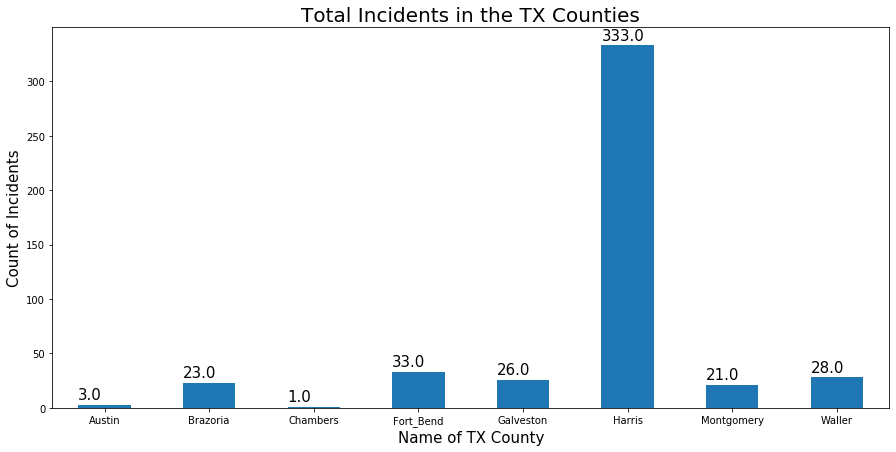

In [294]:
#fig, axs = plt.subplots(figsize=(12, 4))
y = np.ceil(gdfs.groupby(gdfs["COUNTY_NAME"])["TOTAL_MINUTES"].count())
ax = gdfs.groupby(gdfs["COUNTY_NAME"])["TOTAL_MINUTES"].count().plot(figsize=(15,7),
    kind='bar', rot=0)
plt.xlabel("Name of TX County", fontsize=15)
plt.ylabel("Count of Incidents",fontsize=15)
plt.title("Total Incidents in the TX Counties", fontsize=20)
for ind,val in enumerate(y):
    plt.text(ind-0.25, y[ind]+5, str(y[ind]), fontsize=15)


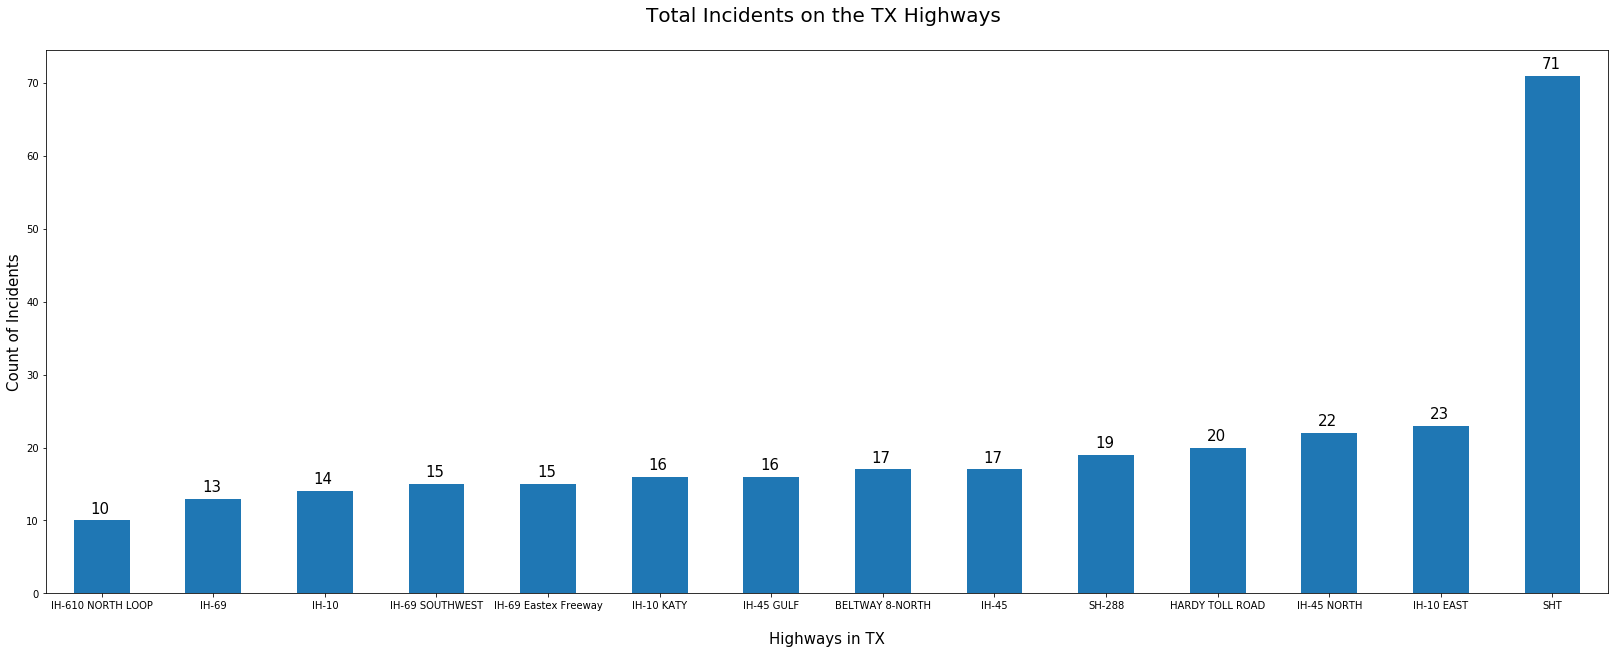

In [330]:
#fig, axs = plt.subplots(figsize=(12, 4))
fig, ax = plt.subplots(figsize=(12,12))
y = gdfs.groupby(["ROADWAY_NAME"])["TOTAL_MINUTES"].count()
y = y.sort_values()
y = y[y > 9]
#print(y)
ax = y.plot(figsize=(28,10), kind='bar', rot=0)
plt.xlabel("\nHighways in TX", fontsize=15)
plt.ylabel("Count of Incidents",fontsize=15)
plt.title("Total Incidents on the TX Highways \n", fontsize=20)
for ind,val in enumerate(y):
    plt.text(ind-0.1, y[ind]+1, str(y[ind]), fontsize=15)
fig.savefig('Highway_Inc_count.png')

In [324]:
#get the highways with most number of incidents

y = gdfs.groupby(["ROADWAY_NAME"])["TOTAL_MINUTES"].count()
y = y.sort_values()
i=0;
highways = []
print("Incident Count | Highway Name \n")
while i < len(y[y > 8]):
    print(y[y[y > 8].index[i]], " | ", y[y > 8].index[i])
    highways.append(y[y > 8].index[i])
    i +=1;
    

Incident Count | Highway Name 

9  |  SH-99 Lanier Pkwy - North
9  |  US-290 NORTHWEST
9  |  BELTWAY 8-WEST
9  |  SH-99 Lanier Pkwy - West
10  |  IH-610 NORTH LOOP
13  |  IH-69
14  |  IH-10
15  |  IH-69 SOUTHWEST
15  |  IH-69 Eastex Freeway
16  |  IH-10 KATY
16  |  IH-45 GULF
17  |  BELTWAY 8-NORTH
17  |  IH-45
19  |  SH-288
20  |  HARDY TOLL ROAD
22  |  IH-45 NORTH
23  |  IH-10 EAST
71  |  SHT


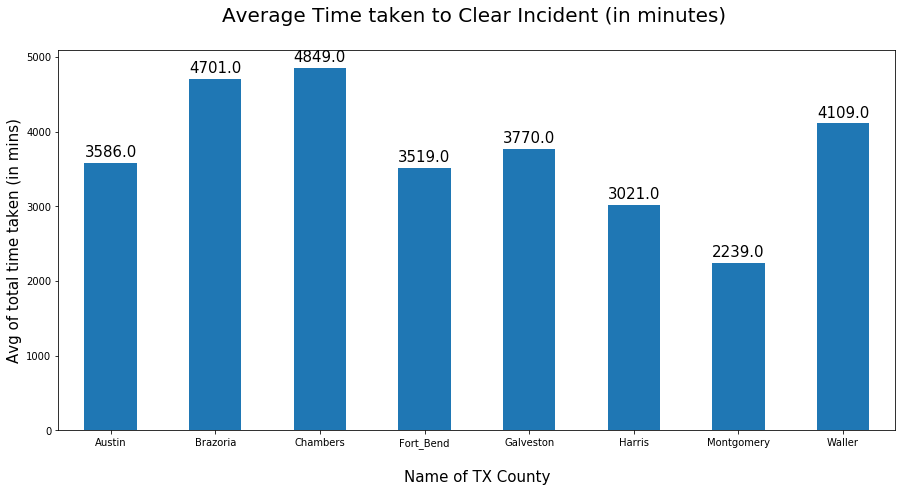

In [332]:
#fig, axs = plt.subplots(figsize=(12, 4))
y = np.ceil(gdfs.groupby(gdfs["COUNTY_NAME"])["TOTAL_MINUTES"].mean())
ax = gdfs.groupby(gdfs["COUNTY_NAME"])["TOTAL_MINUTES"].mean().plot(figsize=(15,7),
    kind='bar', rot=0)
plt.xlabel("\nName of TX County", fontsize=15)
plt.ylabel("Avg of total time taken (in mins)",fontsize=15)
plt.title("Average Time taken to Clear Incident (in minutes) \n", fontsize=20)
for ind,val in enumerate(y):
    plt.text(ind-0.25, y[ind]+80, str(y[ind]), fontsize=15)


In [333]:
gdfs.head()

,1-Sep,25-Aug,26-Aug,27-Aug,28-Aug,29-Aug,30-Aug,31-Aug,CLEARED_DATE_TIME,COUNTY_NAME,...,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,ROADWAY_NAME,Sum,TIME_ENTERED,TOTAL_MINUTES,Totals,geometry,CLEAR_DT,ENTER_DT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/26/2017 3:56,Harris,...,-95.1639,-95.1628,BELTWAY 8-EAST,NaN,8/26/2017 3:56,0.0,NaN,POINT (-95.16390 29.80850),2017-08-26 03:56:00,2017-08-26 03:56:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/26/2017 14:03,Harris,...,-95.1558,-95.1556,BELTWAY 8-EAST,NaN,8/26/2017 8:06,357.0,NaN,POINT (-95.15580 29.66560),2017-08-26 14:03:00,2017-08-26 08:06:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/30/2017 8:55,Harris,...,-95.1984,-95.1984,BELTWAY 8-EAST,NaN,8/27/2017 1:50,4745.0,NaN,POINT (-95.19840 29.88300),2017-08-30 08:55:00,2017-08-27 01:50:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/30/2017 9:20,Harris,...,-95.1984,-95.1984,BELTWAY 8-EAST,NaN,8/27/2017 8:49,4351.0,NaN,POINT (-95.19840 29.88300),2017-08-30 09:20:00,2017-08-27 08:49:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/30/2017 8:53,Harris,...,-95.1562,-95.1561,BELTWAY 8-EAST,NaN,8/27/2017 11:55,4138.0,NaN,POINT (-95.15620 29.64980),2017-08-30 08:53:00,2017-08-27 11:55:00


In [701]:
from folium import plugins
import folium

In [720]:
map = folium.Map(location = [30,-100], tiles='Stamen Terrain', zoom_start = 3, style = "dark_only_labels")

In [721]:
geo_df['COUNTY_NAME'].unique()

#todo use dictionary
g1coords = []
g2coords = []
g3coords = []
g4coords = []
g5coords = []
g6coords = []
g7coords = []
g8coords = []

df1 = geo_df[["COUNTY_NAME","LATITUDE_IB_CW", "LONGITUDE_IB_CW", "geometry"]]
df1 = df1.loc[df1['COUNTY_NAME'] == "Harris"]
g1coords = [[point.xy[1][0], point.xy[0][0]] for point in df1.geometry]

df1 = geo_df[["COUNTY_NAME","LATITUDE_IB_CW", "LONGITUDE_IB_CW", "geometry"]]
df1 = df1.loc[df1['COUNTY_NAME'] == "Waller"]
g2coords = [[point.xy[1][0], point.xy[0][0]] for point in df1.geometry]

df1 = geo_df[["COUNTY_NAME","LATITUDE_IB_CW", "LONGITUDE_IB_CW", "geometry"]]
df1 = df1.loc[df1['COUNTY_NAME'] == "Fort_Bend"]
g3coords = [[point.xy[1][0], point.xy[0][0]] for point in df1.geometry]

df1 = geo_df[["COUNTY_NAME","LATITUDE_IB_CW", "LONGITUDE_IB_CW", "geometry"]]
df1 = df1.loc[df1['COUNTY_NAME'] == "Brazoria"]
g4coords = [[point.xy[1][0], point.xy[0][0]] for point in df1.geometry]

df1 = geo_df[["COUNTY_NAME","LATITUDE_IB_CW", "LONGITUDE_IB_CW", "geometry"]]
df1 = df1.loc[df1['COUNTY_NAME'] == "Montgomery"]
g5coords = [[point.xy[1][0], point.xy[0][0]] for point in df1.geometry]

df1 = geo_df[["COUNTY_NAME","LATITUDE_IB_CW", "LONGITUDE_IB_CW", "geometry"]]
df1 = df1.loc[df1['COUNTY_NAME'] == "Galveston"]
g6coords = [[point.xy[1][0], point.xy[0][0]] for point in df1.geometry]

df1 = geo_df[["COUNTY_NAME","LATITUDE_IB_CW", "LONGITUDE_IB_CW", "geometry"]]
df1 = df1.loc[df1['COUNTY_NAME'] == "Austin"]
g7coords = [[point.xy[1][0], point.xy[0][0]] for point in df1.geometry]

df1 = geo_df[["COUNTY_NAME","LATITUDE_IB_CW", "LONGITUDE_IB_CW", "geometry"]]
df1 = df1.loc[df1['COUNTY_NAME'] == "Chambers"]
g8coords = [[point.xy[1][0], point.xy[0][0]] for point in df1.geometry]

In [722]:
len(g2coords)

28

In [435]:
'''heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdfs.geometry]'''

In [461]:
'''heat_data_rf = [[point.xy[1][0], point.xy[0][0]] for point in geo_rf.geometry]'''

In [462]:
'''i = 0;
while i < len(heat_data_rf):
    print(i , " | ", heat_data_rf[i])
    i+=1'''

0  |  [29.55, -95.08]
1  |  [29.8, -95.77]
2  |  [29.79, -95.62]
3  |  [29.76, -95.65]
4  |  [29.790908, -95.62357]
5  |  [29.79, -95.62]
6  |  [29.4122, -95.1787]
7  |  [29.78, -94.66]
8  |  [29.75215, -94.6733]
9  |  [29.14, -95.29]
10  |  [29.11, -95.46]
11  |  [29.683502, -95.183473]
12  |  [29.633755, -95.114485]
13  |  [29.564191, -95.070795]
14  |  [29.76986, -95.646848]
15  |  [30.164440000000006, -94.64278]
16  |  [30.25, -94.58]
17  |  [29.77, -95.0]
18  |  [29.74, -94.97]
19  |  [29.591725, -95.222089]
20  |  [29.831211, -95.687108]
21  |  [29.875125, -95.769477]
22  |  [29.67638882222, -95.24361]
23  |  [29.656295, -95.228933]
24  |  [29.651497, -95.076001]
25  |  [30.237906, -95.839529]
26  |  [29.70391, -95.566081]
27  |  [29.709284000000004, -95.5825]
28  |  [29.695066, -95.556599]
29  |  [29.672371, -95.527994]
30  |  [29.722625, -95.305332]
31  |  [29.678605, -95.467271]
32  |  [29.715071, -95.643933]
33  |  [29.697018, -95.412138]
34  |  [29.690953000000004, -95.43991

In [463]:
'''del heat_data_rf[320]
del heat_data_rf[253:259]
del heat_data_rf[250]
del heat_data_rf[248]
del heat_data_rf[171:174]
del heat_data_rf[121]
del heat_data_rf[50]'''

In [478]:
plugins.HeatMap(heat_data).add_to(map)

In [723]:
fg = plugins.HeatMap(heat_data_rf, name="Rainfall")
map.add_child(fg)

In [724]:
fg = folium.FeatureGroup(name="Select All")
map.add_child(fg)

In [725]:
g1 = plugins.FeatureGroupSubGroup(fg, geo_df['COUNTY_NAME'].unique()[0])
map.add_child(g1)
g2 = plugins.FeatureGroupSubGroup(fg, geo_df['COUNTY_NAME'].unique()[1])
map.add_child(g2)
g3 = plugins.FeatureGroupSubGroup(fg, geo_df['COUNTY_NAME'].unique()[2])
map.add_child(g3)
g4 = plugins.FeatureGroupSubGroup(fg, geo_df['COUNTY_NAME'].unique()[3])
map.add_child(g4)
g5 = plugins.FeatureGroupSubGroup(fg, geo_df['COUNTY_NAME'].unique()[4])
map.add_child(g5)
g6 = plugins.FeatureGroupSubGroup(fg, geo_df['COUNTY_NAME'].unique()[5])
map.add_child(g6)
g7 = plugins.FeatureGroupSubGroup(fg, geo_df['COUNTY_NAME'].unique()[6])
map.add_child(g7)
g8 = plugins.FeatureGroupSubGroup(fg, geo_df['COUNTY_NAME'].unique()[7])
map.add_child(g8)
#groups - county names
#
for coord in g1coords:
    folium.Marker(location=coord, icon=folium.Icon(color="lightgray"), ).add_to(g1)
for coord in g2coords:
    folium.Marker(location=coord, icon=folium.Icon(color="lightgray")).add_to(g2)
for coord in g3coords:
    folium.Marker(location=coord, icon=folium.Icon(color="lightgray")).add_to(g3)
for coord in g4coords:
    folium.Marker(location=coord, icon=folium.Icon(color="lightgray")).add_to(g4)
for coord in g5coords:
    folium.Marker(location=coord, icon=folium.Icon(color="lightgray")).add_to(g5)
for coord in g6coords:
    folium.Marker(location=coord, icon=folium.Icon(color="lightgray")).add_to(g6)
for coord in g7coords:
    folium.Marker(location=coord, icon=folium.Icon(color="lightgray")).add_to(g7)
for coord in g8coords:
    folium.Marker(location=coord, icon=folium.Icon(color="lightgray")).add_to(g8)



'''folium.Marker(location=heat_data[0],icon=folium.Icon(color="red")).add_to(g1)

folium.Marker([30.33, -96.15]).add_to(g1)

folium.Marker([29.65023, -95.4867]).add_to(g2)
folium.Marker([29.664477, -95.460008]).add_to(g2)'''

folium.LayerControl(collapsed=False).add_to(map)

In [727]:
print("Interactive Map for Rainfall & County Incident Data")
map


Interactive Map for Rainfall & County Incident Data
